In [1]:
import pandas as pd
import Auxiliary
import torch

In [2]:
path = '../dataset/graph/'
with open(path + "ddidpi.nt") as f:
    lines = f.readlines()


def save_graph(path, line):
    with open(path + 'ddidpi_v1.ttl', 'a') as file:
        file.write(line)


def preprocess_v1(lines):
    for line in lines:
        s = line.split(' ')[0]
        p = line.split(' ')[1]
        o = '_'.join(line.split(' ')[2:])
        save_graph('V1/', s + '\t' + p + '\t' + o)


def preprocess_v2(lines):
    for line in lines:
        a = line.replace('>.', '>')
        a = a.replace('<http://www.project-ddidpi.de/DPI/', '')
        a = a.replace('<http://purl.uniprot.org/pubmed/', 'pubmed:')
        a = a.replace('<http://www.project-ddidpi.de/vocab/DPI>', 'DPI')
        a = a.replace('<http://www.project-ddidpi.de/vocab/', '')
        a = a.replace('<http://www.w3.org/1999/02/22-rdf-syntax-ns#', '')
        a = a.replace('<http://www.project-ddidpi.de/DDI/', '')
        a = a.replace('^^<http://www.w3.org/2001/XMLSchema#string', '')
        a = a.replace('<http://www.project-ddidpi.de/Drug/', 'Drug:') 

        a = a.replace('<http://purl.uniprot.org/uniprot/', 'uniprot:') 
        a = a.replace('<http://dbpedia.org/resource/', '') 
        a = a.replace('<http://www.project-ddidpi.de/Annotation/', '') 
        a = a.replace('<http://www.project-ddidpi.de/Protein/', 'Protein:') 
        a = a.replace('<http://purl.uniprot.org/geneid/', 'gene:') 

        a = a.replace('>', '')
        preprocess_v1([a])
#         save_graph('V1/', a)

In [3]:
preprocess_v2(lines)

In [ ]:
Auxiliary.pipeline_kge('config.csv')

In [3]:
path = 'V1/'
kg = pd.read_csv(path + 'ddidpi_v1.ttl', sep='\t', header=None)
display(kg.shape, kg.head(2))

(3287076, 3)

,0,1,2
0,DB00001-P00734,type,DPI
1,DB00001-P00734,hasPubMedID,pubmed:10505536


# Unsupervised Learning¶
#### Save Learned Embeddings

In [4]:
m = 'TransH'  #RotatE
fold=1


# path = '../Cancer_treatment/Embeddings/KG versions/V4/Uniform/G2/'
print(path)
model = torch.load(path + m + str(fold) + '/trained_model.pkl', map_location='cpu')


#model = torch.load('G/QuatE5/trained_model.pkl', map_location='cpu') #QuatE1
entity_embedding_tensor, relation_embedding_tensor =  Auxiliary.get_learned_embeddings(model)

V1/


## Computing clusters of the predicted heads by the model. Visualize PCA Projection to 2D
#### Creating dataframe with the embeddings predicted entities

In [5]:
tf_dataset, triple_dataset = Auxiliary.load_dataset(path, 'ddidpi_v1.ttl')
entity = Auxiliary.filter_entity(kg, 'Drug:DB', 'uniprot:')

# tf_dataset, triple_dataset = load_dataset(path, 'train_1.ttl')
# entity = []
df_predicted_entities, new_df = Auxiliary.create_dataframe_predicted_entities(entity_embedding_tensor, entity, tf_dataset)

In [6]:
drug = [s for s in entity if 'Drug:DB' in s]
protein = [s for s in entity if 'uniprot:' in s]

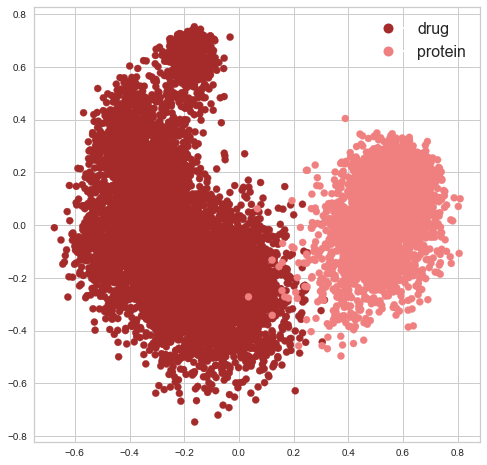

In [7]:
Auxiliary.plot_two_classes(new_df, drug, protein, 'drug', 'protein')

In [ ]:
new_df.to_csv('dataset/embedding_TransH1.csv', index=None)

## Select the optimal number of clusters
#### elbow: By default, the distortion score is computed, the sum of square distances from each point to its assigned center. 

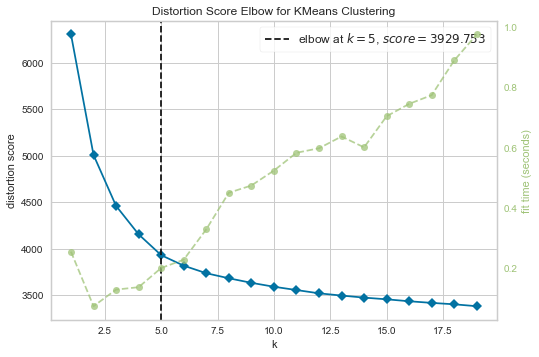

In [8]:
num_cls = Auxiliary.elbow_KMeans(df_predicted_entities, 1, 20)

## Visualize PCA Projection to 2D

C:\Users\rivasa\GitHub\Project_Scientific_DB_Programming\Embedding\Auxiliary.py:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['cluster'] = kmeans.fit_predict(new_df)
C:\Users\rivasa\GitHub\Project_Scientific_DB_Programming\Embedding\Auxiliary.py:182: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['c'] = new_df.cluster.map(color_dictionary)


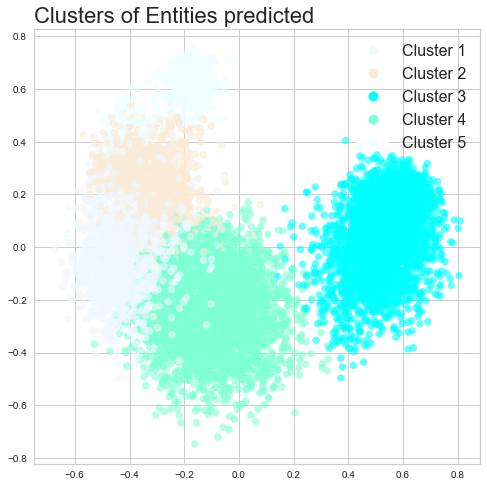

In [9]:
Auxiliary.plot_cluster(num_cls, df_predicted_entities, num_cls)

In [10]:
dpi = list(kg.loc[(kg[1]=='type') & (kg[2]=='DPI')][0].values)
ddi = list(kg.loc[(kg[1]=='type') & (kg[2]=='DDI')][0].values)
node = dpi + ddi

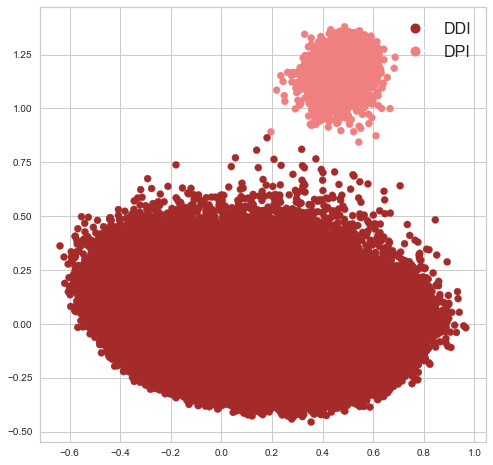

In [11]:
df_predicted_entities, new_df = Auxiliary.create_dataframe_predicted_entities(entity_embedding_tensor, node, tf_dataset)
Auxiliary.plot_two_classes(new_df, ddi, dpi, 'DDI', 'DPI')

In [14]:
new_df

,0,1,2,3,4,5,6,7,8,9,...,43,44,45,46,47,48,49,target,cls,c
11562,0.036280,-0.007027,-0.046899,0.189904,-0.013246,0.048660,0.102502,-0.134241,0.085665,-0.219423,...,0.163905,0.077833,-0.005635,-0.262515,-0.187174,0.051418,-0.188013,DB00001-P00734,DPI,#F08080
11563,-0.008259,0.021564,0.007357,0.223663,0.020159,0.061382,0.088702,-0.096816,0.064579,-0.155182,...,0.143642,0.082115,-0.017365,-0.232016,-0.184272,0.045499,-0.158442,DB00002-O75015,DPI,#F08080
11564,0.031727,-0.024641,-0.060135,0.173961,0.022426,0.040656,0.095947,-0.153284,0.069199,-0.171050,...,0.144061,0.077392,-0.018248,-0.221149,-0.206683,0.061245,-0.182897,DB00002-P00533,DPI,#F08080
11565,0.031589,-0.008693,-0.000667,0.244312,-0.013302,0.078346,0.094213,-0.095666,0.101564,-0.173466,...,0.136036,0.068770,-0.025048,-0.222863,-0.163014,0.048912,-0.157929,DB00002-P00736,DPI,#F08080
11566,-0.019282,-0.028309,-0.050944,0.228538,-0.043933,0.020166,0.053574,-0.144572,0.069053,-0.196827,...,0.125992,0.044901,-0.038448,-0.238358,-0.191032,0.030444,-0.164257,DB00002-P02745,DPI,#F08080
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
647420,0.051518,0.083063,0.082594,0.214958,0.087671,0.185857,0.158325,0.102827,0.159015,0.055766,...,0.148987,0.126718,0.181488,0.012376,0.119123,0.098868,0.120396,DB15598-DB13823-serum_concentration,DDI,#A52A2A
647421,0.018300,0.243212,0.092696,0.087732,0.024137,0.088018,0.143170,0.117812,0.093723,0.016969,...,0.105259,0.100229,0.022172,-0.029543,0.108830,0.047813,0.032857,DB15598-DB13995-absorption,DDI,#A52A2A
647422,0.110886,0.064957,0.019749,0.188692,0.110984,0.139672,0.159941,0.153997,0.141997,0.008337,...,0.146568,0.135539,0.054150,-0.034899,0.127956,0.100914,0.047032,DB15598-DB13995-serum_concentration,DDI,#A52A2A
647423,0.163023,0.247823,0.064543,0.158208,0.133963,0.153137,0.148915,0.136301,0.134104,0.059740,...,0.200402,0.142981,0.117224,0.127910,0.131946,0.161180,0.085888,DB15598-DB14523-absorption,DDI,#A52A2A


In [8]:
entity_type = kg.loc[kg[1]=='type']
entity_type = dict(entity_type[[0,2]].values)
entity_type

{'DB00001-P00734': 'DPI',
 'DB00006-P00734': 'DPI',
 'DB00025-P00734': 'DPI',
 'DB00055-P00734': 'DPI',
 'DB00100-P00734': 'DPI',
 'DB00170-P00734': 'DPI',
 'DB00278-P00734': 'DPI',
 'DB01123-P00734': 'DPI',
 'DB01766-P00734': 'DPI',
 'DB01767-P00734': 'DPI',
 'DB02193-P00734': 'DPI',
 'DB02351-P00734': 'DPI',
 'DB02723-P00734': 'DPI',
 'DB03136-P00734': 'DPI',
 'DB03159-P00734': 'DPI',
 'DB03847-P00734': 'DPI',
 'DB03865-P00734': 'DPI',
 'DB04136-P00734': 'DPI',
 'DB04591-P00734': 'DPI',
 'DB04722-P00734': 'DPI',
 'DB04786-P00734': 'DPI',
 'DB04898-P00734': 'DPI',
 'DB06695-P00734': 'DPI',
 'DB06838-P00734': 'DPI',
 'DB06841-P00734': 'DPI',
 'DB06845-P00734': 'DPI',
 'DB06850-P00734': 'DPI',
 'DB06853-P00734': 'DPI',
 'DB06854-P00734': 'DPI',
 'DB06858-P00734': 'DPI',
 'DB06859-P00734': 'DPI',
 'DB06861-P00734': 'DPI',
 'DB06865-P00734': 'DPI',
 'DB06866-P00734': 'DPI',
 'DB06868-P00734': 'DPI',
 'DB06869-P00734': 'DPI',
 'DB06878-P00734': 'DPI',
 'DB06911-P00734': 'DPI',
 'DB06919-P0

In [10]:
Auxiliary.plot_KGE(new_df, entity_type)

C:\Users\rivasa\Anaconda3\lib\site-packages\pandas\core\series.py:1056: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cacher_needs_updating = self._check_is_chained_assignment_possible()


KeyError: 'Drug:DB00004'

In [14]:
kg.loc[kg[2]=='Drug:DB00001']

,0,1,2
3158966,DB00001-P00734,hasDrugID,Drug:DB00001
